# Reading rep_02 simulations files

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import prody as pdy
import MDAnalysis as mda
# from pyfamsa import Aligner, Sequence
from yaml import load, Loader
import pandas as pd
import seaborn as sns
import plotly.express as px
from Bio import AlignIO
from Bio.SeqUtils import seq1
from Bio.SeqIO import SeqRecord
from Bio import SeqIO
from Bio.Seq import Seq
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sk_pca
from MDAnalysis.analysis import align
import pickle
import tqdm
plt.rcParams['svg.fonttype'] = 'none'

/home/kaustubh/miniconda3/envs/md-analysis/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


# Form-I + Form-I'

In [2]:
md_reference_data = load(open("env_rep2.yaml"), Loader)['experiment_01']

In [ ]:
del md_reference_data['anci-wo-ssu']
del md_reference_data['9rub']
md_reference_data

{'1bwv': {'dry_dcd': '1bwv.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '1bwv.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '3zxw': {'dry_dcd': '3zxw.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '3zxw.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '6ftl': {'dry_dcd': '6ftl.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '6ftl.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '6ura': {'dry_dcd': '6ura.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '6ura.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '7snv': {'dry_dcd': '7snv.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '7snv.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '8ruc': {'dry_dcd': '8ruc.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '8ruc.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 'anci': {'dry_dcd': 'anci.250ns.md01.dry.dcd',
  'dry_pdb': 'anci.250ns.md01.dry.rechained.pdb',
  'time': 'ancient'},
 'anciab': {'dry_dcd': 'anciab.250ns.md01.dry.dcd',
  'dry_pdb': 'anciab.250ns.md01.dry.rechained.pdb',
  'time'

## Aligning sequences

In [4]:
def load_trajectory(code, data, path):
    
    """
    loads the following files
    - an MDAnalysis trajectory with the dried (water-removed) dcd
    - an MDAnalysis Universe with the starting PDB (jic)
    - an prody with the starting PDB (pretty useful when MDAnalysis fails)
    """
    return dict(
        code=code,
        trajectory_dry = mda.Universe(
            path + data['dry_pdb'].replace(".dry.pdb", ".dry.rechained.pdb"), 
            path + data['dry_dcd'], 
            frames='all', in_memory=True
        ),
        reference_pdy=pdy.parsePDB(path + data['dry_pdb'].replace(".dry.pdb", ".dry.rechained.pdb")),
        reference=mda.Universe(
            path + data['dry_pdb'].replace(".dry.pdb", ".dry.rechained.pdb")
        ),
        time=data['time']
    )



path = '/home/kaustubh/MD_Simulations/simulations_data/'
exp01_md = []
for key, items in list(md_reference_data.items()):
    print(f"-- code {key}", end='')
    exp01_md.append(load_trajectory(
        code=key, data=items, path=path
    ))
    print(f" loaded")
    
exp01_md = pd.DataFrame.from_records(exp01_md).set_index('code')

-- code 1bwv

@> 77672 atoms and 1 coordinate set(s) were parsed in 0.37s.


 loaded
-- code 3zxw

@> 69984 atoms and 1 coordinate set(s) were parsed in 0.33s.


 loaded
-- code 6ftl

@> 77416 atoms and 1 coordinate set(s) were parsed in 0.36s.


 loaded
-- code 6ura

@> 54648 atoms and 1 coordinate set(s) were parsed in 0.26s.


 loaded
-- code 7snv

@> 70240 atoms and 1 coordinate set(s) were parsed in 0.33s.


 loaded
-- code 8ruc

@> 74224 atoms and 1 coordinate set(s) were parsed in 0.35s.


 loaded
-- code anci

@> 72128 atoms and 1 coordinate set(s) were parsed in 0.34s.


 loaded
-- code anciab

@> 72640 atoms and 1 coordinate set(s) were parsed in 0.34s.


 loaded
-- code ancicd

@> 76208 atoms and 1 coordinate set(s) were parsed in 0.37s.


 loaded
-- code ancia

@> 73536 atoms and 1 coordinate set(s) were parsed in 0.35s.


 loaded
-- code ancib

@> 72352 atoms and 1 coordinate set(s) were parsed in 0.43s.


 loaded
-- code anciip

@> 55120 atoms and 1 coordinate set(s) were parsed in 0.26s.


 loaded
-- code ancip

@> 54768 atoms and 1 coordinate set(s) were parsed in 0.26s.


 loaded
-- code anci-wo-ssu

@> 58584 atoms and 1 coordinate set(s) were parsed in 0.28s.


 loaded


In [5]:
# exp01_md = pd.read_pickle('~/MD_Simulations/simulations_data/pkls/exp01_md_rep2.pkl')
# exp01_md = exp01_md[~exp01_md['code'].isin(['9rub', 'anci-wo-ssu'])]
exp01_md

,trajectory_dry,reference_pdy,reference,time
code,,,,
1bwv,<Universe with 77672 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 77672 atoms>,extant
3zxw,<Universe with 69984 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 69984 atoms>,extant
6ftl,<Universe with 77416 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 77416 atoms>,extant
6ura,<Universe with 54648 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 54648 atoms>,extant
7snv,<Universe with 70240 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 70240 atoms>,extant
8ruc,<Universe with 74224 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 74224 atoms>,extant
anci,<Universe with 72128 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 72128 atoms>,ancient
anciab,<Universe with 72640 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 72640 atoms>,ancient
ancicd,<Universe with 76208 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 76208 atoms>,ancient


In [14]:
def residues2sequence(residues):
    out = ""
    for res in residues:
        resname = res.resname.replace('KCX', 'LYS')

        out += seq1(resname)
    return out

def get_sequences(ref, chains):
    sequence_bag = []
    for chain in chains:
        sequence_bag.append(
            (  
                chain,
                residues2sequence(ref.select_atoms(f'protein and chainID {chain}').residues)
            )
            
        )
    return sequence_bag

exp01_md['rbcl_seq'] = exp01_md['reference'].apply(lambda x: get_sequences(x, chains='ACEGIKMO'))
exp01_md['rbcl_seq']

code
1bwv           [(A, RIKNSRYESGVIPYAKMGYWNPDYQVKDTDVLALFRVTPQP...
3zxw           [(A, GYQAGVKDYRLTYYTPDYTPKDTDILAAFRVTPQPGVPFEE...
6ftl           [(A, QSVSERTRIKSDRYESGVIPYAKMGYWDASYTVKDTDVLAL...
6ura           [(A, DAYKAGVRAYAVDYYVPDYIPQDTDLLCAFRIQPRGVDMIE...
7snv           [(A, VKKYSAGVKEYRQTYWMPEYTPLDSDILACFKITPQPGVDR...
8ruc           [(A, ASVEFKAGVKDYKLTYYTPEYETLDTDILAAFRVSPQPGVP...
anci           [(A, AQFQAGVREYRETYYDPGYTPKDTDILAAFRVTPQPGVPPE...
anciab         [(A, AMYQAGVKDYRETYYDPDYTPKDTDILAAFRVTPQPGVPPE...
ancicd         [(A, SEEEKERLSAGVRPYAEMGYWDPDYEPKDTDILAAFRITPQ...
ancia          [(A, AKTYQAGVKDYRETYWDPDYTPKDTDILACFKITPQPGVPR...
ancib          [(A, KAGYQAGVKDYRLTYYTPDYTPKDTDILAAFRVTPQPGVPP...
anciip         [(A, PQFQAGVRPYRETYYDPGYTPRDTDILCAFRIQPKPGVDLE...
ancip          [(A, PQFQAGVRPYRETYYDPDYTPRETDILCAFRIQPKPGVDLV...
anci-wo-ssu    [(A, AQFQAGVREYRETYYDPGYTPKDTDILAAFRVTPQPGVPPE...
Name: rbcl_seq, dtype: object

In [ ]:
aligned_sequences = list(pdy.MSAFile(
    './output/review2.no_9rub.sequence.aligned.fasta', format='fasta') # TODO Fix this
)

aligment_matrix = np.stack([item.getArray() for item in aligned_sequences])
conserved_positions = []
for i in range(aligment_matrix.shape[1]):
    if b'-' not in np.unique(aligment_matrix[:, i]).tolist():
        conserved_positions.append(i)

## Marking conserved positions

In [8]:
def remove_gaps(sequence):
    for i, tokken in enumerate(sequence):
        if tokken != '-':
            yield i, tokken

def conserved2bfactor(sequence, conserved, chain, structure):
    # structure.add_TopologyAttr('tempfactors')
    residues = structure.select_atoms(f'protein and chainID {chain}').residues
    for (i, tokken), res in zip(remove_gaps(sequence), residues):
        
        if tokken != seq1(res.resname) and res.resname != "HIE":
            # print(res.resnum, tokken, seq1(res.resname))
            pass
        if i in conserved:
            try:
                print(res.resnum, tokken, seq1(res.resname))
                res.atoms.tempfactors = 1.0
            except AttributeError:
                print(f"{i} {tokken} {res.resname}")
        else:
            res.atoms.tempfactors = 0.0

In [9]:
for seq in aligned_sequences:
    key = seq.getLabel()
    protein = key.split()[0].split('_')[0]
    chain = key.split()[0].split('_')[1]
    item = exp01_md.loc[protein]
    print(protein, chain)
    conserved2bfactor(
        str(seq), conserved_positions, chain, item.trajectory_dry
    )

1bwv A
12 R R
13 Y Y
14 E E
15 S S
16 G G
17 V V
18 I I
19 P P
20 Y Y
21 A A
22 K K
22 M M
24 Y Y
25 W W
26 N N
27 P P
28 D D
29 Y Y
30 Q Q
31 V V
32 K K
33 D D
34 T T
35 D D
36 V V
37 L L
38 A A
39 L L
40 F F
41 R R
42 V V
43 T T
44 P P
45 Q Q
47 G G
48 V V
49 D D
50 P P
51 I I
52 E E
53 A A
54 A A
55 A A
56 A A
57 V V
58 A A
59 G G
60 E E
61 S S
62 S S
63 T T
64 A A
65 T T
66 W W
67 T T
68 V V
69 V V
70 W W
71 T T
72 D D
73 L L
74 L L
75 T T
76 A A
77 A A
78 D D
79 L L
80 Y Y
81 R R
82 A A
83 K K
84 A A
85 Y Y
86 K K
87 V V
88 D D
96 Q Q
97 Y Y
98 F F
99 A A
100 Y Y
101 I I
102 A A
103 Y Y
104 E E
105 L L
106 D D
107 L L
108 F F
109 E E
110 E E
111 G G
112 S S
113 I I
114 A A
115 N N
116 L L
117 T T
118 A A
119 S S
120 I I
121 I I
122 G G
123 N N
124 V V
125 F F
126 G G
127 F F
128 K K
129 A A
130 V V
131 K K
132 A A
133 L L
134 R R
135 L L
136 E E
137 D D
138 M M
139 R R
140 L L
141 P P
142 L L
143 A A
144 Y Y
145 L L
147 T T
148 F F
149 Q Q
150 G G
151 P P
152 A A
153 T T
154 G G
1

## Extracting coordinates for LSU PCA (aligning every LSU)

In [10]:
chain ="A"
A = exp01_md.loc['1bwv'].referenceg = item.trajectory_dry.select_atoms(f'protein and prop tempfactor > 0.0 and name CA and chainID {chain}')

In [11]:
positions = []
systems = []
chains = []
scaler = StandardScaler(with_std=False)

for key, item in exp01_md.iterrows():
    protein_positions_buffer = []
    for i, frame in enumerate(item.trajectory_dry.trajectory[125:625]):
    # for i, frame in enumerate(item.trajectory_dry.trajectory):
        tmp_positions = []
        for chain in 'ACEIGKMO':
            g = item.trajectory_dry.select_atoms(f'protein and prop tempfactor > 0.0 and name CA and chainID {chain}')
            positions.append(g.positions)
            systems.append(key)
            chains.append(chain)

In [ ]:
for i in range(len(positions)):
    positions[i] = pdy.superpose(positions[i], A.positions)[0].reshape(-1)
np.stack(positions, axis=0)

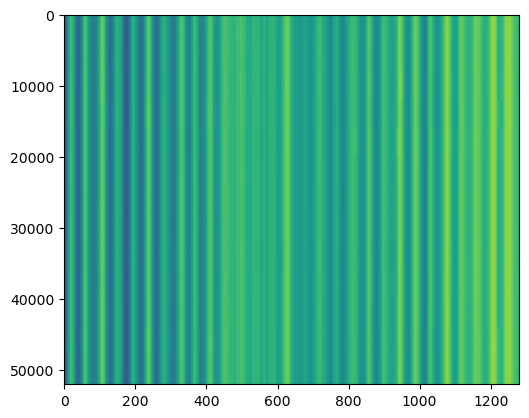

In [15]:
positions = np.stack(positions, axis=0)
plt.imshow(positions, aspect=0.02)

In [ ]:
with open("/home/kaustubh/MD_Simulations/simulations_data/pkls/Form_I_Ip_positions_array_rep2.pkl", 'wb') as f:
    pickle.dump(positions, f)

In [ ]:
with open("/home/kaustubh/MD_Simulations/simulations_data/pkls/Form_I_Ip_systems_rep2.pkl", 'wb') as f:
    pickle.dump(systems, f)

# Form-I + Form-I' + Anc-I w/o RbcS

In [2]:
md_reference_data = load(open("env_rep2.yaml"), Loader)['experiment_01']

In [3]:
# del md_reference_data['anci-wo-ssu']
del md_reference_data['9rub']
md_reference_data

{'1bwv': {'dry_dcd': '1bwv.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '1bwv.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '3zxw': {'dry_dcd': '3zxw.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '3zxw.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '6ftl': {'dry_dcd': '6ftl.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '6ftl.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '6ura': {'dry_dcd': '6ura.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '6ura.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '7snv': {'dry_dcd': '7snv.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '7snv.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '8ruc': {'dry_dcd': '8ruc.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '8ruc.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 'anci': {'dry_dcd': 'anci.250ns.md01.dry.dcd',
  'dry_pdb': 'anci.250ns.md01.dry.rechained.pdb',
  'time': 'ancient'},
 'anciab': {'dry_dcd': 'anciab.250ns.md01.dry.dcd',
  'dry_pdb': 'anciab.250ns.md01.dry.rechained.pdb',
  'time'

## Aligning sequences

In [4]:
def load_trajectory(code, data, path):
    
    """
    loads the following files
    - an MDAnalysis trajectory with the dried (water-removed) dcd
    - an MDAnalysis Universe with the starting PDB (jic)
    - an prody with the starting PDB (pretty useful when MDAnalysis fails)
    """
    return dict(
        code=code,
        trajectory_dry = mda.Universe(
            path + data['dry_pdb'].replace(".dry.pdb", ".dry.rechained.pdb"), 
            path + data['dry_dcd'], 
            frames='all', in_memory=True
        ),
        reference_pdy=pdy.parsePDB(path + data['dry_pdb'].replace(".dry.pdb", ".dry.rechained.pdb")),
        reference=mda.Universe(
            path + data['dry_pdb'].replace(".dry.pdb", ".dry.rechained.pdb")
        ),
        time=data['time']
    )



path = '/home/kaustubh/MD_Simulations/simulations_data/'
exp01_md = []
for key, items in list(md_reference_data.items()):
    print(f"-- code {key}", end='')
    exp01_md.append(load_trajectory(
        code=key, data=items, path=path
    ))
    print(f" loaded")
    
exp01_md = pd.DataFrame.from_records(exp01_md).set_index('code')

-- code 1bwv

@> 77672 atoms and 1 coordinate set(s) were parsed in 0.37s.


 loaded
-- code 3zxw

@> 69984 atoms and 1 coordinate set(s) were parsed in 0.33s.


 loaded
-- code 6ftl

@> 77416 atoms and 1 coordinate set(s) were parsed in 0.37s.


 loaded
-- code 6ura

@> 54648 atoms and 1 coordinate set(s) were parsed in 0.26s.


 loaded
-- code 7snv

@> 70240 atoms and 1 coordinate set(s) were parsed in 0.33s.


 loaded
-- code 8ruc

@> 74224 atoms and 1 coordinate set(s) were parsed in 0.35s.


 loaded
-- code anci

@> 72128 atoms and 1 coordinate set(s) were parsed in 0.34s.


 loaded
-- code anciab

@> 72640 atoms and 1 coordinate set(s) were parsed in 0.34s.


 loaded
-- code ancicd

@> 76208 atoms and 1 coordinate set(s) were parsed in 0.36s.


 loaded
-- code ancia

@> 73536 atoms and 1 coordinate set(s) were parsed in 0.35s.


 loaded
-- code ancib

@> 72352 atoms and 1 coordinate set(s) were parsed in 0.34s.


 loaded
-- code anciip

@> 55120 atoms and 1 coordinate set(s) were parsed in 0.26s.


 loaded
-- code ancip

@> 54768 atoms and 1 coordinate set(s) were parsed in 0.26s.


 loaded
-- code anci-wo-ssu

@> 58584 atoms and 1 coordinate set(s) were parsed in 0.28s.


 loaded


In [5]:
# exp01_md = pd.read_pickle('~/MD_Simulations/simulations_data/pkls/exp01_md_rep2.pkl')
# exp01_md = exp01_md[~exp01_md['code'].isin(['9rub', 'anci-wo-ssu'])]
exp01_md

,trajectory_dry,reference_pdy,reference,time
code,,,,
1bwv,<Universe with 77672 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 77672 atoms>,extant
3zxw,<Universe with 69984 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 69984 atoms>,extant
6ftl,<Universe with 77416 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 77416 atoms>,extant
6ura,<Universe with 54648 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 54648 atoms>,extant
7snv,<Universe with 70240 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 70240 atoms>,extant
8ruc,<Universe with 74224 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 74224 atoms>,extant
anci,<Universe with 72128 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 72128 atoms>,ancient
anciab,<Universe with 72640 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 72640 atoms>,ancient
ancicd,<Universe with 76208 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 76208 atoms>,ancient


In [6]:
def residues2sequence(residues):
    out = ""
    for res in residues:
        resname = res.resname.replace('KCX', 'LYS')

        out += seq1(resname)
    return out

def get_sequences(ref, chains):
    sequence_bag = []
    for chain in chains:
        sequence_bag.append(
            (  
                chain,
                residues2sequence(ref.select_atoms(f'protein and chainID {chain}').residues)
            )
            
        )
    return sequence_bag

exp01_md['rbcl_seq'] = exp01_md['reference'].apply(lambda x: get_sequences(x, chains='ACEGIKMO'))
exp01_md['rbcl_seq']

code
1bwv           [(A, RIKNSRYESGVIPYAKMGYWNPDYQVKDTDVLALFRVTPQP...
3zxw           [(A, GYQAGVKDYRLTYYTPDYTPKDTDILAAFRVTPQPGVPFEE...
6ftl           [(A, QSVSERTRIKSDRYESGVIPYAKMGYWDASYTVKDTDVLAL...
6ura           [(A, DAYKAGVRAYAVDYYVPDYIPQDTDLLCAFRIQPRGVDMIE...
7snv           [(A, VKKYSAGVKEYRQTYWMPEYTPLDSDILACFKITPQPGVDR...
8ruc           [(A, ASVEFKAGVKDYKLTYYTPEYETLDTDILAAFRVSPQPGVP...
anci           [(A, AQFQAGVREYRETYYDPGYTPKDTDILAAFRVTPQPGVPPE...
anciab         [(A, AMYQAGVKDYRETYYDPDYTPKDTDILAAFRVTPQPGVPPE...
ancicd         [(A, SEEEKERLSAGVRPYAEMGYWDPDYEPKDTDILAAFRITPQ...
ancia          [(A, AKTYQAGVKDYRETYWDPDYTPKDTDILACFKITPQPGVPR...
ancib          [(A, KAGYQAGVKDYRLTYYTPDYTPKDTDILAAFRVTPQPGVPP...
anciip         [(A, PQFQAGVRPYRETYYDPGYTPRDTDILCAFRIQPKPGVDLE...
ancip          [(A, PQFQAGVRPYRETYYDPDYTPRETDILCAFRIQPKPGVDLV...
anci-wo-ssu    [(A, AQFQAGVREYRETYYDPGYTPKDTDILAAFRVTPQPGVPPE...
Name: rbcl_seq, dtype: object

In [7]:
exp01_md['rbcl_seq'] = exp01_md['reference'].apply(lambda x: get_sequences(x, chains='ACEGIKMO'))
exp01_md['rbcl_seq']
seq_list = []
for key, item in exp01_md['rbcl_seq'].items():
    for chain, seq in item:
        seq_list.append(SeqRecord(seq=Seq(seq), id='{:s}_{:s}'.format(key, chain)))
SeqIO.write(seq_list, './output/review2.Form_I_Ip_anci_wo_ssu.sequence.fasta', 'fasta')

112

In [7]:
!/home/kaustubh/miniconda3/envs/md-analysis/bin/mafft --maxiterate 1000 --localpair './output/review2.Form_I_Ip_anci_wo_ssu.sequence.fasta' > './output/review2.Form_I_Ip_anci_wo_ssu.sequence.aligned.fasta'

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.505
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
  110 / 112
done.

Progressive alignment ... 
STEP   109 /111 
Reallocating..done. *alloclen = 1956
STEP   111 /111 
done.
tbfast (aa) Version 7.505
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

  110 / 112
Segment   1/  1    1- 484
STEP 002-001-1  identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical

In [9]:
aligned_sequences = list(pdy.MSAFile(
    './output/review2.Form_I_Ip_anci_wo_ssu.sequence.aligned.fasta', format='fasta') # TODO Fix this
)

aligment_matrix = np.stack([item.getArray() for item in aligned_sequences])
conserved_positions = []
for i in range(aligment_matrix.shape[1]):
    if b'-' not in np.unique(aligment_matrix[:, i]).tolist():
        conserved_positions.append(i)

## Marking conserved positions

In [10]:
def remove_gaps(sequence):
    for i, tokken in enumerate(sequence):
        if tokken != '-':
            yield i, tokken

def conserved2bfactor(sequence, conserved, chain, structure):
    # structure.add_TopologyAttr('tempfactors')
    residues = structure.select_atoms(f'protein and chainID {chain}').residues
    for (i, tokken), res in zip(remove_gaps(sequence), residues):
        
        if tokken != seq1(res.resname) and res.resname != "HIE":
            # print(res.resnum, tokken, seq1(res.resname))
            pass
        if i in conserved:
            try:
                print(res.resnum, tokken, seq1(res.resname))
                res.atoms.tempfactors = 1.0
            except AttributeError:
                print(f"{i} {tokken} {res.resname}")
        else:
            res.atoms.tempfactors = 0.0

In [11]:
for seq in aligned_sequences:
    key = seq.getLabel()
    protein = key.split()[0].split('_')[0]
    chain = key.split()[0].split('_')[1]
    item = exp01_md.loc[protein]
    print(protein, chain)
    conserved2bfactor(
        str(seq), conserved_positions, chain, item.trajectory_dry
    )

1bwv A
12 R R
13 Y Y
14 E E
15 S S
16 G G
17 V V
18 I I
19 P P
20 Y Y
21 A A
22 K K
22 M M
24 Y Y
25 W W
26 N N
27 P P
28 D D
29 Y Y
30 Q Q
31 V V
32 K K
33 D D
34 T T
35 D D
36 V V
37 L L
38 A A
39 L L
40 F F
41 R R
42 V V
43 T T
44 P P
45 Q Q
47 G G
48 V V
49 D D
50 P P
51 I I
52 E E
53 A A
54 A A
55 A A
56 A A
57 V V
58 A A
59 G G
60 E E
61 S S
62 S S
63 T T
64 A A
65 T T
66 W W
67 T T
68 V V
69 V V
70 W W
71 T T
72 D D
73 L L
74 L L
75 T T
76 A A
77 A A
78 D D
79 L L
80 Y Y
81 R R
82 A A
83 K K
84 A A
85 Y Y
86 K K
87 V V
88 D D
96 Q Q
97 Y Y
98 F F
99 A A
100 Y Y
101 I I
102 A A
103 Y Y
104 E E
105 L L
106 D D
107 L L
108 F F
109 E E
110 E E
111 G G
112 S S
113 I I
114 A A
115 N N
116 L L
117 T T
118 A A
119 S S
120 I I
121 I I
122 G G
123 N N
124 V V
125 F F
126 G G
127 F F
128 K K
129 A A
130 V V
131 K K
132 A A
133 L L
134 R R
135 L L
136 E E
137 D D
138 M M
139 R R
140 L L
141 P P
142 L L
143 A A
144 Y Y
145 L L
147 T T
148 F F
149 Q Q
150 G G
151 P P
152 A A
153 T T
154 G G
1

## Extracting coordinates for LSU PCA (aligning every LSU)

In [12]:
chain ="A"
A = exp01_md.loc['1bwv'].referenceg = item.trajectory_dry.select_atoms(f'protein and prop tempfactor > 0.0 and name CA and chainID {chain}')

In [13]:
positions = []
systems = []
chains = []
scaler = StandardScaler(with_std=False)

for key, item in exp01_md.iterrows():
    protein_positions_buffer = []
    for i, frame in enumerate(item.trajectory_dry.trajectory[125:625]):
    # for i, frame in enumerate(item.trajectory_dry.trajectory):
        tmp_positions = []
        for chain in 'ACEIGKMO':
            g = item.trajectory_dry.select_atoms(f'protein and prop tempfactor > 0.0 and name CA and chainID {chain}')
            positions.append(g.positions)
            systems.append(key)
            chains.append(chain)

In [14]:
for i in range(len(positions)):
    positions[i] = pdy.superpose(positions[i], A.positions)[0].reshape(-1)
np.stack(positions, axis=0)

array([[ 23.56548457, -46.50057759,  -4.84303399, ...,  44.49207393,
          8.14836302,  23.40589831],
       [ 23.16534894, -48.5208593 ,  -5.70320715, ...,  46.70856991,
          9.56013618,  18.33669578],
       [ 23.09916427, -47.72198677,  -3.99653181, ...,  43.09866196,
          9.13682196,  24.07877611],
       ...,
       [ 11.59637933, -53.22084288,  -5.74572517, ...,  41.93231794,
          8.52817665,  24.83205716],
       [ 25.63831738, -50.0170363 ,  -2.98334661, ...,  42.87711299,
          9.04792739,  25.22449978],
       [ 23.1072349 , -48.84528191,  -3.47898552, ...,  43.59632803,
          8.08059677,  23.94115482]])

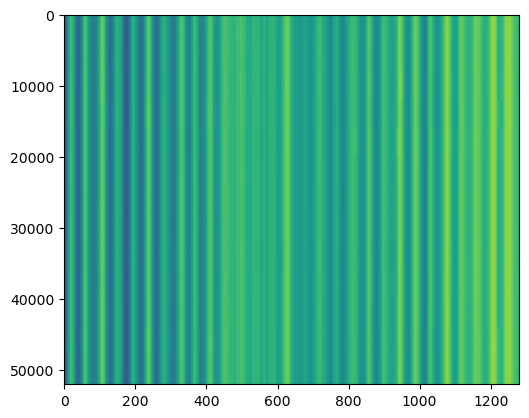

In [ ]:
positions = np.stack(positions, axis=0)
plt.imshow(positions, aspect=0.02)

In [15]:
with open("/home/kaustubh/MD_Simulations/simulations_data/pkls/Form_I_Ip_anci-wo-ssu_positions_array_rep2.pkl", 'wb') as f:
    pickle.dump(positions, f)

In [ ]:
with open("/home/kaustubh/MD_Simulations/simulations_data/pkls/Form_I_Ip_anci-wo-ssu_systems_rep2.pkl", 'wb') as f:
    pickle.dump(systems, f)

# Form-I + Form-I' + 9RUB

In [4]:
md_reference_data = load(open("env_rep2.yaml"), Loader)['experiment_01']

In [5]:
del md_reference_data['anci-wo-ssu']
# del md_reference_data['9rub']
md_reference_data

{'1bwv': {'dry_dcd': '1bwv.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '1bwv.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '3zxw': {'dry_dcd': '3zxw.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '3zxw.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '6ftl': {'dry_dcd': '6ftl.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '6ftl.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '6ura': {'dry_dcd': '6ura.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '6ura.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '7snv': {'dry_dcd': '7snv.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '7snv.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '8ruc': {'dry_dcd': '8ruc.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '8ruc.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 '9rub': {'dry_dcd': '9rub.250ns.md01.stride_4.dry.dcd',
  'dry_pdb': '9rub.250ns.md01.dry.rechained.pdb',
  'time': 'extant'},
 'anci': {'dry_dcd': 'anci.250ns.md01.dry.dcd',
  'dry_pdb': 'anci.250ns.md01.dry.rechained.pdb',
  'tim

## Aligning sequences

In [6]:
def load_trajectory(code, data, path):
    
    """
    loads the following files
    - an MDAnalysis trajectory with the dried (water-removed) dcd
    - an MDAnalysis Universe with the starting PDB (jic)
    - an prody with the starting PDB (pretty useful when MDAnalysis fails)
    """
    return dict(
        code=code,
        trajectory_dry = mda.Universe(
            path + data['dry_pdb'].replace(".dry.pdb", ".dry.rechained.pdb"), 
            path + data['dry_dcd'], 
            frames='all', in_memory=True
        ),
        reference_pdy=pdy.parsePDB(path + data['dry_pdb'].replace(".dry.pdb", ".dry.rechained.pdb")),
        reference=mda.Universe(
            path + data['dry_pdb'].replace(".dry.pdb", ".dry.rechained.pdb")
        ),
        time=data['time']
    )



path = '/home/kaustubh/MD_Simulations/simulations_data/'
exp01_md = []
for key, items in list(md_reference_data.items()):
    print(f"-- code {key}", end='')
    exp01_md.append(load_trajectory(
        code=key, data=items, path=path
    ))
    print(f" loaded")
    
exp01_md = pd.DataFrame.from_records(exp01_md).set_index('code')

-- code 1bwv

@> 77672 atoms and 1 coordinate set(s) were parsed in 0.37s.


 loaded
-- code 3zxw

@> 69984 atoms and 1 coordinate set(s) were parsed in 0.33s.


 loaded
-- code 6ftl

@> 77416 atoms and 1 coordinate set(s) were parsed in 0.37s.


 loaded
-- code 6ura

@> 54648 atoms and 1 coordinate set(s) were parsed in 0.26s.


 loaded
-- code 7snv

@> 70240 atoms and 1 coordinate set(s) were parsed in 0.34s.


 loaded
-- code 8ruc

@> 74224 atoms and 1 coordinate set(s) were parsed in 0.36s.


 loaded
-- code 9rub

@> 13838 atoms and 1 coordinate set(s) were parsed in 0.07s.


 loaded
-- code anci

@> 72128 atoms and 1 coordinate set(s) were parsed in 0.35s.


 loaded
-- code anciab

@> 72640 atoms and 1 coordinate set(s) were parsed in 0.35s.


 loaded
-- code ancicd

@> 76208 atoms and 1 coordinate set(s) were parsed in 0.36s.


 loaded
-- code ancia

@> 73536 atoms and 1 coordinate set(s) were parsed in 0.35s.


 loaded
-- code ancib

@> 72352 atoms and 1 coordinate set(s) were parsed in 0.34s.


 loaded
-- code anciip

@> 55120 atoms and 1 coordinate set(s) were parsed in 0.26s.


 loaded
-- code ancip

@> 54768 atoms and 1 coordinate set(s) were parsed in 0.26s.


 loaded


In [7]:
# exp01_md = pd.read_pickle('~/MD_Simulations/simulations_data/pkls/exp01_md_rep2.pkl')
# exp01_md = exp01_md[~exp01_md['code'].isin(['9rub', 'anci-wo-ssu'])]
exp01_md

,trajectory_dry,reference_pdy,reference,time
code,,,,
1bwv,<Universe with 77672 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 77672 atoms>,extant
3zxw,<Universe with 69984 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 69984 atoms>,extant
6ftl,<Universe with 77416 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 77416 atoms>,extant
6ura,<Universe with 54648 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 54648 atoms>,extant
7snv,<Universe with 70240 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 70240 atoms>,extant
8ruc,<Universe with 74224 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 74224 atoms>,extant
9rub,<Universe with 13838 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 13838 atoms>,extant
anci,<Universe with 72128 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 72128 atoms>,ancient
anciab,<Universe with 72640 atoms>,"(((Atom N (index 0))), ((Atom H1 (index 1))), ...",<Universe with 72640 atoms>,ancient


In [8]:
def residues2sequence(residues):
    out = ""
    for res in residues:
        resname = res.resname.replace('KCX', 'LYS')

        out += seq1(resname)
    return out

def get_sequences(ref, chains):
    sequence_bag = []
    for chain in chains:
        sequence_bag.append(
            (  
                chain,
                residues2sequence(ref.select_atoms(f'protein and chainID {chain}').residues)
            )
            
        )
    return sequence_bag

exp01_md['rbcl_seq'] = exp01_md['reference'].apply(lambda x: get_sequences(x, chains='ACEGIKMO'))
exp01_md['rbcl_seq']

code
1bwv      [(A, RIKNSRYESGVIPYAKMGYWNPDYQVKDTDVLALFRVTPQP...
3zxw      [(A, GYQAGVKDYRLTYYTPDYTPKDTDILAAFRVTPQPGVPFEE...
6ftl      [(A, QSVSERTRIKSDRYESGVIPYAKMGYWDASYTVKDTDVLAL...
6ura      [(A, DAYKAGVRAYAVDYYVPDYIPQDTDLLCAFRIQPRGVDMIE...
7snv      [(A, VKKYSAGVKEYRQTYWMPEYTPLDSDILACFKITPQPGVDR...
8ruc      [(A, ASVEFKAGVKDYKLTYYTPEYETLDTDILAAFRVSPQPGVP...
9rub      [(A, ), (C, ), (E, ), (G, DQSSRYVNLALKEEDLIAGG...
anci      [(A, AQFQAGVREYRETYYDPGYTPKDTDILAAFRVTPQPGVPPE...
anciab    [(A, AMYQAGVKDYRETYYDPDYTPKDTDILAAFRVTPQPGVPPE...
ancicd    [(A, SEEEKERLSAGVRPYAEMGYWDPDYEPKDTDILAAFRITPQ...
ancia     [(A, AKTYQAGVKDYRETYWDPDYTPKDTDILACFKITPQPGVPR...
ancib     [(A, KAGYQAGVKDYRLTYYTPDYTPKDTDILAAFRVTPQPGVPP...
anciip    [(A, PQFQAGVRPYRETYYDPGYTPRDTDILCAFRIQPKPGVDLE...
ancip     [(A, PQFQAGVRPYRETYYDPDYTPRETDILCAFRIQPKPGVDLV...
Name: rbcl_seq, dtype: object

In [ ]:
exp01_md['rbcl_seq'] = exp01_md['reference'].apply(lambda x: get_sequences(x, chains='ACEGIKMO'))
exp01_md['rbcl_seq']
seq_list = []
for key, item in exp01_md['rbcl_seq'].items():
    for chain, seq in item:
        seq_list.append(SeqRecord(seq=Seq(seq), id='{:s}_{:s}'.format(key, chain)))
SeqIO.write(seq_list, './output/review2.Form_I_Ip_9rub.sequence.fasta', 'fasta')

112

Manually edit the sequence file to remove 9rub chains (only keep G & M)

In [ ]:
!/home/kaustubh/miniconda3/envs/md-analysis/bin/mafft --maxiterate 1000 --localpair './output/review2.Form_I_Ip_9rub.sequence.fasta' > './output/review2.Form_I_Ip_9rub.sequence.aligned.fasta'

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.505
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
  100 / 106
done.

Progressive alignment ... 
STEP   105 /105 
done.
tbfast (aa) Version 7.505
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

  100 / 106
Segment   1/  1    1- 514
STEP 002-104-1  rejected..    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.   
Converged.

done
dvtditr (aa) Version 7.505
alg=A, model=BLOSUM

In [9]:
aligned_sequences = list(pdy.MSAFile(
    './output/review2.Form_I_Ip_9rub.sequence.aligned.fasta', format='fasta') # TODO Fix this
)

aligment_matrix = np.stack([item.getArray() for item in aligned_sequences])
conserved_positions = []
for i in range(aligment_matrix.shape[1]):
    if b'-' not in np.unique(aligment_matrix[:, i]).tolist():
        conserved_positions.append(i)

## Marking conserved positions

In [10]:
def remove_gaps(sequence):
    for i, tokken in enumerate(sequence):
        if tokken != '-':
            yield i, tokken

def conserved2bfactor(sequence, conserved, chain, structure):
    # structure.add_TopologyAttr('tempfactors')
    residues = structure.select_atoms(f'protein and chainID {chain}').residues
    for (i, tokken), res in zip(remove_gaps(sequence), residues):
        
        if tokken != seq1(res.resname) and res.resname != "HIE":
            # print(res.resnum, tokken, seq1(res.resname))
            pass
        if i in conserved:
            try:
                print(res.resnum, tokken, seq1(res.resname))
                res.atoms.tempfactors = 1.0
            except AttributeError:
                print(f"{i} {tokken} {res.resname}")
        else:
            res.atoms.tempfactors = 0.0

In [11]:
for seq in aligned_sequences:
    key = seq.getLabel()
    protein = key.split()[0].split('_')[0]
    chain = key.split()[0].split('_')[1]
    item = exp01_md.loc[protein]
    print(protein, chain)
    conserved2bfactor(
        str(seq), conserved_positions, chain, item.trajectory_dry
    )

1bwv A
15 S S
16 G G
17 V V
18 I I
19 P P
20 Y Y
21 A A
22 K K
22 M M
24 Y Y
25 W W
26 N N
27 P P
28 D D
29 Y Y
30 Q Q
31 V V
32 K K
33 D D
34 T T
35 D D
36 V V
37 L L
38 A A
39 L L
40 F F
41 R R
42 V V
43 T T
44 P P
45 Q Q
47 G G
48 V V
49 D D
50 P P
51 I I
52 E E
53 A A
54 A A
55 A A
56 A A
57 V V
58 A A
59 G G
60 E E
61 S S
62 S S
63 T T
64 A A
65 T T
66 W W
67 T T
68 V V
69 V V
70 W W
71 T T
72 D D
73 L L
74 L L
75 T T
78 D D
79 L L
80 Y Y
81 R R
82 A A
83 K K
84 A A
85 Y Y
86 K K
87 V V
88 D D
96 Q Q
97 Y Y
98 F F
99 A A
100 Y Y
101 I I
102 A A
103 Y Y
104 E E
105 L L
106 D D
107 L L
108 F F
109 E E
110 E E
111 G G
112 S S
113 I I
114 A A
115 N N
116 L L
117 T T
118 A A
119 S S
120 I I
121 I I
122 G G
123 N N
124 V V
125 F F
126 G G
127 F F
128 K K
129 A A
130 V V
131 K K
132 A A
133 L L
134 R R
135 L L
136 E E
137 D D
138 M M
139 R R
140 L L
141 P P
142 L L
143 A A
144 Y Y
145 L L
147 T T
148 F F
149 Q Q
150 G G
151 P P
152 A A
153 T T
154 G G
155 V V
156 I I
157 L L
158 E E
159 

## Extracting coordinates for LSU PCA (aligning every LSU)

In [12]:
chain ="A"
A = exp01_md.loc['1bwv'].referenceg = item.trajectory_dry.select_atoms(f'protein and prop tempfactor > 0.0 and name CA and chainID {chain}')

In [13]:
positions = []
systems = []
chains = []
scaler = StandardScaler(with_std=False)

for key, item in exp01_md.iterrows():
    protein_positions_buffer = []
    for i, frame in enumerate(item.trajectory_dry.trajectory[125:625]):
    # for i, frame in enumerate(item.trajectory_dry.trajectory):
        tmp_positions = []
        if key != '9rub':
            for chain in 'ACEIGKMO':
                g = item.trajectory_dry.select_atoms(f'protein and prop tempfactor > 0.0 and name CA and chainID {chain}')
                positions.append(g.positions)
                systems.append(key)
                chains.append(chain)
        else:
            for chain in 'GM':
                g = item.trajectory_dry.select_atoms(f'protein and prop tempfactor > 0.0 and name CA and chainID {chain}')
                positions.append(g.positions)
                systems.append(key)
                chains.append(chain)

In [14]:
for i in range(len(positions)):
    positions[i] = pdy.superpose(positions[i], A.positions)[0].reshape(-1)
np.stack(positions, axis=0)

array([[ 18.03679337, -48.96181531,   2.65608318, ...,  45.20056101,
          9.82373398,  21.64313662],
       [ 19.94300736, -49.63725335,   4.43360188, ...,  47.11618997,
         11.03893466,  16.35342059],
       [ 17.80400478, -49.25992989,   3.68282452, ...,  43.83969695,
         10.79640264,  22.30612423],
       ...,
       [ 21.02938062, -47.31930889,  11.68190581, ...,  46.48033599,
         11.61356589,  22.0537717 ],
       [ 17.63801774, -47.64091831,  11.0615248 , ...,  46.79924463,
         13.97812331,  25.70549163],
       [ 16.90779908, -48.79387269,   7.80360013, ...,  41.9095638 ,
         12.84396648,  22.71980306]])

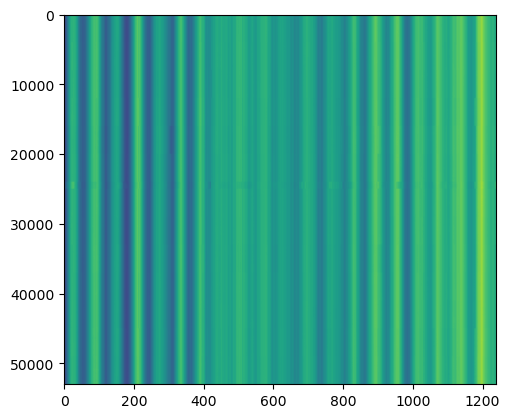

In [15]:
positions = np.stack(positions, axis=0)
plt.imshow(positions, aspect=0.02)

In [ ]:
positions.shape

In [16]:
with open("/home/kaustubh/MD_Simulations/simulations_data/pkls/Form_I_Ip_9rub_positions_array_rep2.pkl", 'wb') as f:
    pickle.dump(positions, f)

In [17]:
with open("/home/kaustubh/MD_Simulations/simulations_data/pkls/Form_I_Ip_9rub_systems_rep2.pkl", 'wb') as f:
    pickle.dump(systems, f)